In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [2]:
salary=pd.read_csv('D:/salary.csv')
salary.head(10)

,YearsExperience,Salary
0,1.1,33234
1,1.5,40102
2,2.4,45435
3,2.8,54757
4,2.8,57577
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,45454
9,3.7,57189


In [3]:
x=salary.iloc[:,:-1]
x

,YearsExperience
0,1.1
1,1.5
2,2.4
3,2.8
4,2.8
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [4]:
x=salary.iloc[:,:-1].values
x

array([[ 1.1],
       [ 1.5],
       [ 2.4],
       [ 2.8],
       [ 2.8],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3]])

In [5]:
y=salary.iloc[:,-1].values
y

array([ 33234,  40102,  45435,  54757,  57577,  56642,  60150,  54445,
        45454,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391], dtype=int64)

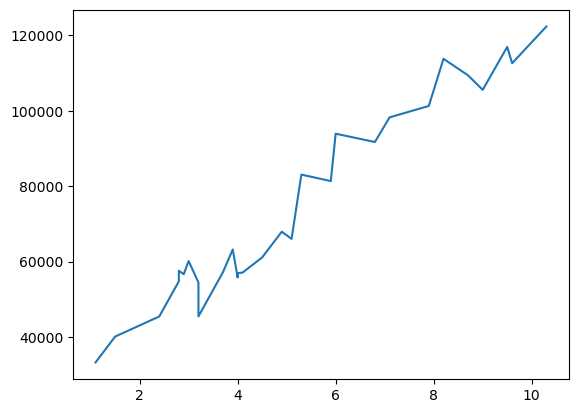

In [6]:
plt.plot(x,y)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train_test_split(x)

[array([[ 5.9],
        [10.3],
        [ 4.5],
        [ 6.8],
        [ 2.8],
        [ 2.9],
        [ 7.1],
        [ 4.1],
        [ 2.8],
        [ 9.6],
        [ 4.9],
        [ 8.7],
        [ 1.1],
        [ 7.9],
        [ 2.4],
        [ 8.2],
        [ 6. ],
        [ 3.7],
        [ 4. ],
        [ 3.2],
        [ 3.2]]),
 array([[9.5],
        [3. ],
        [9. ],
        [3.9],
        [5.1],
        [4. ],
        [1.5],
        [5.3]])]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [9]:
x_train.shape

(23, 1)

In [10]:
x_test.shape

(6, 1)

In [11]:
y_train.shape

(23,)

In [12]:
y_test.shape

(6,)

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr)

LinearRegression()


In [14]:
y_pred=lr.predict(x_test)
y_pred

array([ 51367.66059924, 104037.36529297,  50373.89258615, 124906.49356785,
        62299.10874323, 111987.50939769])

In [15]:
y_test

array([ 56642, 113812,  54757, 122391,  56957, 105582], dtype=int64)

In [16]:
df_x_test =pd.DataFrame(x_test, columns = ['Experience'])
df_y_test= pd.DataFrame(y_test, columns = ['Salary'])
df_y_test_pred =  pd.DataFrame(y_pred, columns = ['Prediction'])
df_diff =df_y_test- df_y_test_pred
y_test_pred = pd.concat ([df_x_test ,df_y_test, df_y_test_pred ],axis =1)
y_test_pred['Difference'] =df_y_test ['Salary']- df_y_test_pred['Prediction']
print (y_test_pred)

   Experience  Salary     Prediction   Difference
0         2.9   56642   51367.660599  5274.339401
1         8.2  113812  104037.365293  9774.634707
2         2.8   54757   50373.892586  4383.107414
3        10.3  122391  124906.493568 -2515.493568
4         4.0   56957   62299.108743 -5342.108743
5         9.0  105582  111987.509398 -6405.509398


In [17]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print (accuracy)

0.9576366747899157


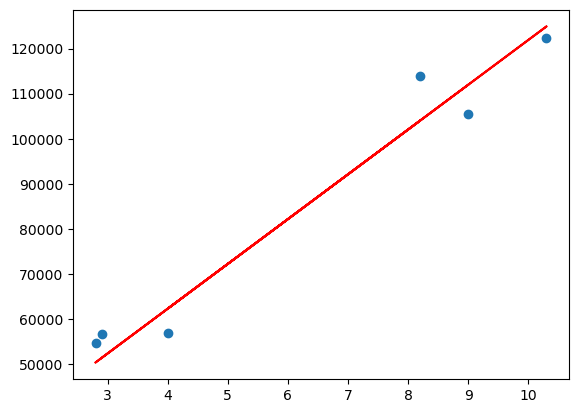

In [18]:
plt.scatter (x_test, y_test)
plt.plot (x_test, y_pred,'r')
plt.show()

In [19]:
y_pred_final= lr.predict (x)
print (y_pred_final)

[ 33479.83636364  37454.90841599  46398.8205338   50373.89258615
  50373.89258615  51367.66059924  52361.42861233  54348.96463851
  54348.96463851  59317.80470396  61305.34073014  62299.10874323
  62299.10874323  63292.87675631  67267.94880867  71243.02086103
  73230.55688721  75218.09291339  81180.70099192  82174.46900501
  90124.61310972  93105.91714899 101056.06125371 104037.36529297
 109006.20535842 111987.50939769 116956.34946314 117950.11747622
 124906.49356785]


In [20]:
y_pred_final = pd.DataFrame(y_pred_final,columns= ['Prediction'])
result = pd.concat([salary,y_pred_final], axis =1)
result['Difference'] = result['Salary'] - result['Prediction']
print (result)
result.to_excel("Predictive_LinearRegression.xlsx")

    YearsExperience  Salary     Prediction    Difference
0               1.1   33234   33479.836364   -245.836364
1               1.5   40102   37454.908416   2647.091584
2               2.4   45435   46398.820534   -963.820534
3               2.8   54757   50373.892586   4383.107414
4               2.8   57577   50373.892586   7203.107414
5               2.9   56642   51367.660599   5274.339401
6               3.0   60150   52361.428612   7788.571388
7               3.2   54445   54348.964639     96.035361
8               3.2   45454   54348.964639  -8894.964639
9               3.7   57189   59317.804704  -2128.804704
10              3.9   63218   61305.340730   1912.659270
11              4.0   55794   62299.108743  -6505.108743
12              4.0   56957   62299.108743  -5342.108743
13              4.1   57081   63292.876756  -6211.876756
14              4.5   61111   67267.948809  -6156.948809
15              4.9   67938   71243.020861  -3305.020861
16              5.1   66029   7

In [21]:
from sklearn.metrics import r2_score
accuracy = r2_score(y,y_pred_final)
print (accuracy)

0.9549414615335409


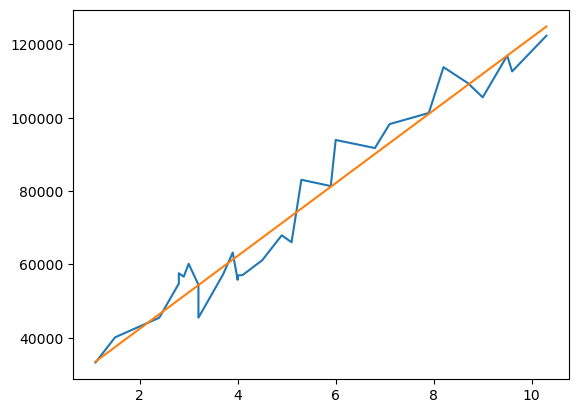

In [22]:
plt.plot(x,y)
plt.plot(x,y_pred_final)
plt.show()

In [23]:
lr.predict([[17]])#2d array

array([191488.95044483])

In [24]:
lr.predict([[19],[11],[7.5]])

array([211364.31070662, 131862.86965947,  97080.98920135])